In [6]:
import glob
import cv2

from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import PIL
from PIL import Image

%matplotlib inline

In [2]:
data_path = "../data/raw/text_mnist/*"

In [3]:
classes_paths = glob.glob(data_path)

In [4]:
lett = []
imgs = []
for classe_paths in classes_paths:
    letter = classe_paths.split("/")[-1]
    paths = glob.glob(classe_paths + "/*")
    for path in paths:
        try:
            img = Image.open(path)
            img = np.asarray(img.resize((28, 28), PIL.Image.ANTIALIAS))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            imgs.append(img)
            lett.append(letter)
        except:
            pass

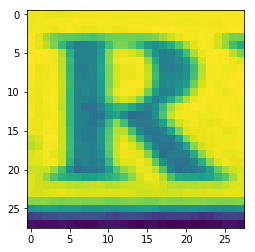

In [5]:
plt.imshow(imgs[0])

In [7]:
list_hog_fd = []
for feature in imgs:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

/Users/az02210/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [10]:
tree = ExtraTreesClassifier()
tree.fit(hog_features, lett)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
pred = tree.predict(hog_features)
print(accuracy_score(pred, lett), "on train set")

0.99987012987 on train set
